In [16]:
#impotinhg the libraries needed for the study 
#if comments are removed the program will explode
import numpy as np
#linear algebra
import pandas as pd
#more robust exploratory analysis
from sklearn.model_selection import GridSearchCV
#exhustive search over specified parameter values for an estimator
from sklearn.tree import DecisionTreeRegressor
#a decision tree regression model1
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
#plotting cute graphs
%matplotlib inline

# Read the Files

In [17]:
#reading the files
train=pd.read_csv('Walmart.csv')
test=pd.read_csv('Walmart.csv')
store=pd.read_csv('Walmart.csv')
feature=pd.read_csv('Walmart.csv')
sample_submission=pd.read_csv('Walmart.csv')

In [18]:
train.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [19]:
feature.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [20]:
store.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
Store           6435 non-null int64
Date            6435 non-null object
Weekly_Sales    6435 non-null float64
Holiday_Flag    6435 non-null int64
Temperature     6435 non-null float64
Fuel_Price      6435 non-null float64
CPI             6435 non-null float64
Unemployment    6435 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [22]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
Store           6435 non-null int64
Date            6435 non-null object
Weekly_Sales    6435 non-null float64
Holiday_Flag    6435 non-null int64
Temperature     6435 non-null float64
Fuel_Price      6435 non-null float64
CPI             6435 non-null float64
Unemployment    6435 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [23]:
print(store.describe())

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


In [25]:
train.shape

(6435, 8)

In [26]:
train.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [28]:
train.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [27]:
train.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [29]:
train.Weekly_Sales.describe().T

count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders.binary import BinaryEncoder
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [6]:
#reading the files
train=pd.read_csv('Walmart.csv')
test=pd.read_csv('Walmart.csv')
store=pd.read_csv('Walmart.csv')
feature=pd.read_csv('Walmart.csv')
sample_submission=pd.read_csv('Walmart.csv')

In [9]:
train.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [10]:
train.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [12]:
train.Date=pd.to_datetime(train.Date)
test.Date=pd.to_datetime(test.Date)

In [13]:
train.Date

0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
          ...    
6430   2012-09-28
6431   2012-05-10
6432   2012-12-10
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [14]:
test.Date

0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
          ...    
6430   2012-09-28
6431   2012-05-10
6432   2012-12-10
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [15]:
train['year']=train.Date.dt.year
train['week']=train.Date.dt.week
test['year']=test.Date.dt.year
test['week']=test.Date.dt.week

In [16]:
test.year

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
6430    2012
6431    2012
6432    2012
6433    2012
6434    2012
Name: year, Length: 6435, dtype: int64

In [17]:
test.week

0       17
1       48
2        7
3        8
4       18
        ..
6430    39
6431    19
6432    50
6433    42
6434    43
Name: week, Length: 6435, dtype: int64

In [18]:
train.year

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
6430    2012
6431    2012
6432    2012
6433    2012
6434    2012
Name: year, Length: 6435, dtype: int64

In [19]:
train.week

0       17
1       48
2        7
3        8
4       18
        ..
6430    39
6431    19
6432    50
6433    42
6434    43
Name: week, Length: 6435, dtype: int64

In [22]:
train.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,week
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,26.000000
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,14.511794
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,14.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,26.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,38.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,52.000000


In [28]:
train.Store.unique().size

45

In [29]:
train.Store.value_counts(normalize=True).head()

43    0.022222
41    0.022222
33    0.022222
29    0.022222
25    0.022222
Name: Store, dtype: float64

In [30]:
train.Store.value_counts(normalize=True).tail()

18    0.022222
14    0.022222
10    0.022222
6     0.022222
4     0.022222
Name: Store, dtype: float64

In [32]:
train.CPI.unique().size

2145

In [33]:
train.week.value_counts(normalize=True).head()

15    0.027972
17    0.027972
28    0.027972
37    0.027972
19    0.027972
Name: week, dtype: float64

In [34]:
train.week.value_counts(normalize=True).tail()

27    0.013986
31    0.013986
35    0.013986
39    0.013986
4     0.013986
Name: week, dtype: float64

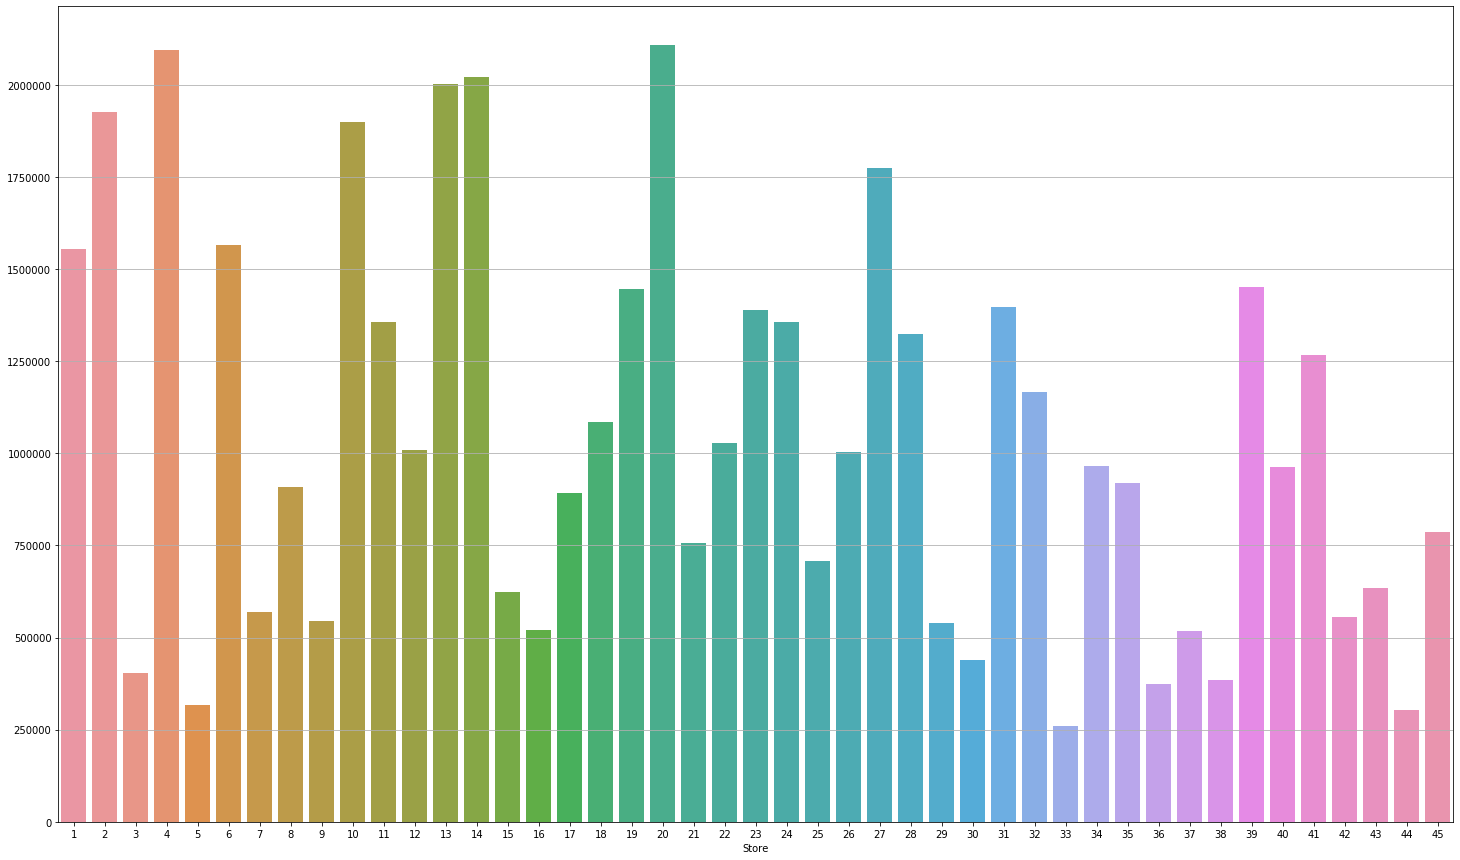

In [36]:
Store_sales=train.groupby('Store')['Weekly_Sales'].mean()
plt.figure(figsize=(25,15))
sns.barplot(Store_sales.index,Store_sales.values)
plt.grid(axis='y')
plt.show()

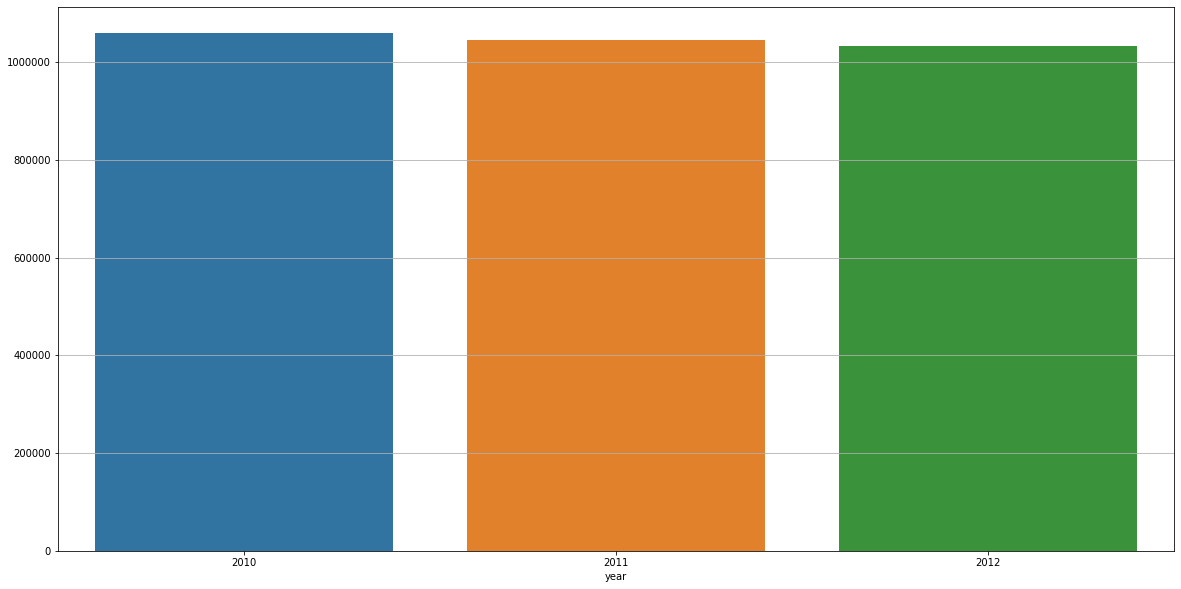

In [37]:
Store_year=train.groupby('year')['Weekly_Sales'].mean()
plt.figure(figsize=(20,10))
sns.barplot(Store_year.index,Store_year.values)
plt.grid(axis='y')
plt.show()

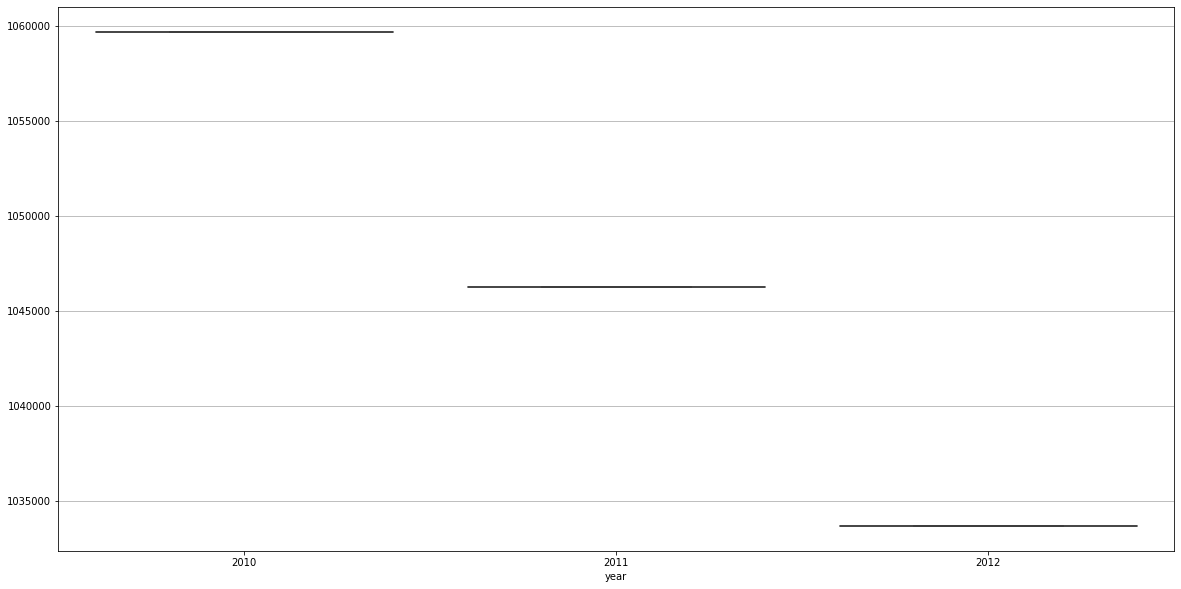

In [40]:
Store_year=train.groupby('year')['Weekly_Sales'].mean()
plt.figure(figsize=(20,10))
sns.boxplot(Store_year.index,Store_year.values)
plt.grid(axis='y')
plt.show()

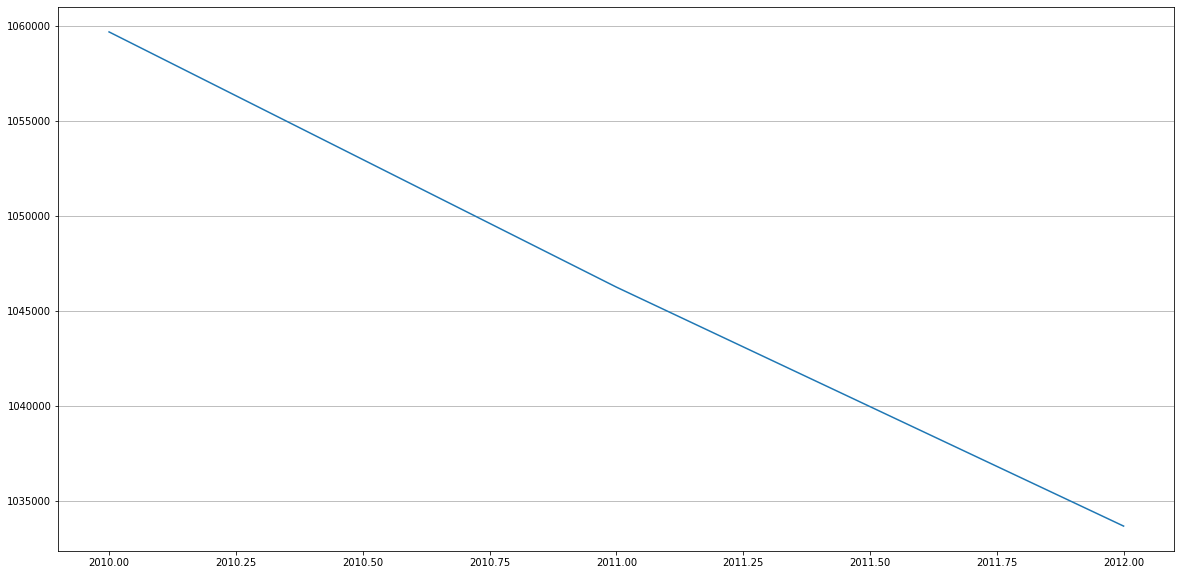

In [43]:
Store_year=train.groupby('year')['Weekly_Sales'].mean()
plt.figure(figsize=(20,10))
plt.plot(Store_year.index,Store_year.values)
plt.grid(axis='y')
plt.show()

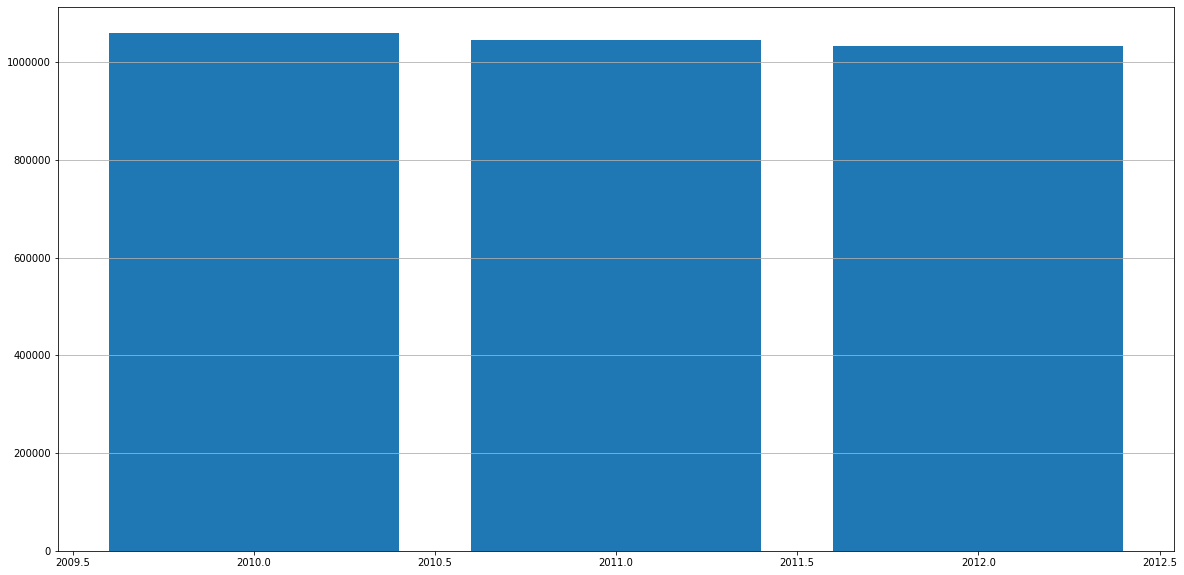

In [44]:
Store_year=train.groupby('year')['Weekly_Sales'].mean()
plt.figure(figsize=(20,10))
plt.bar(Store_year.index,Store_year.values)
plt.grid(axis='y')
plt.show()

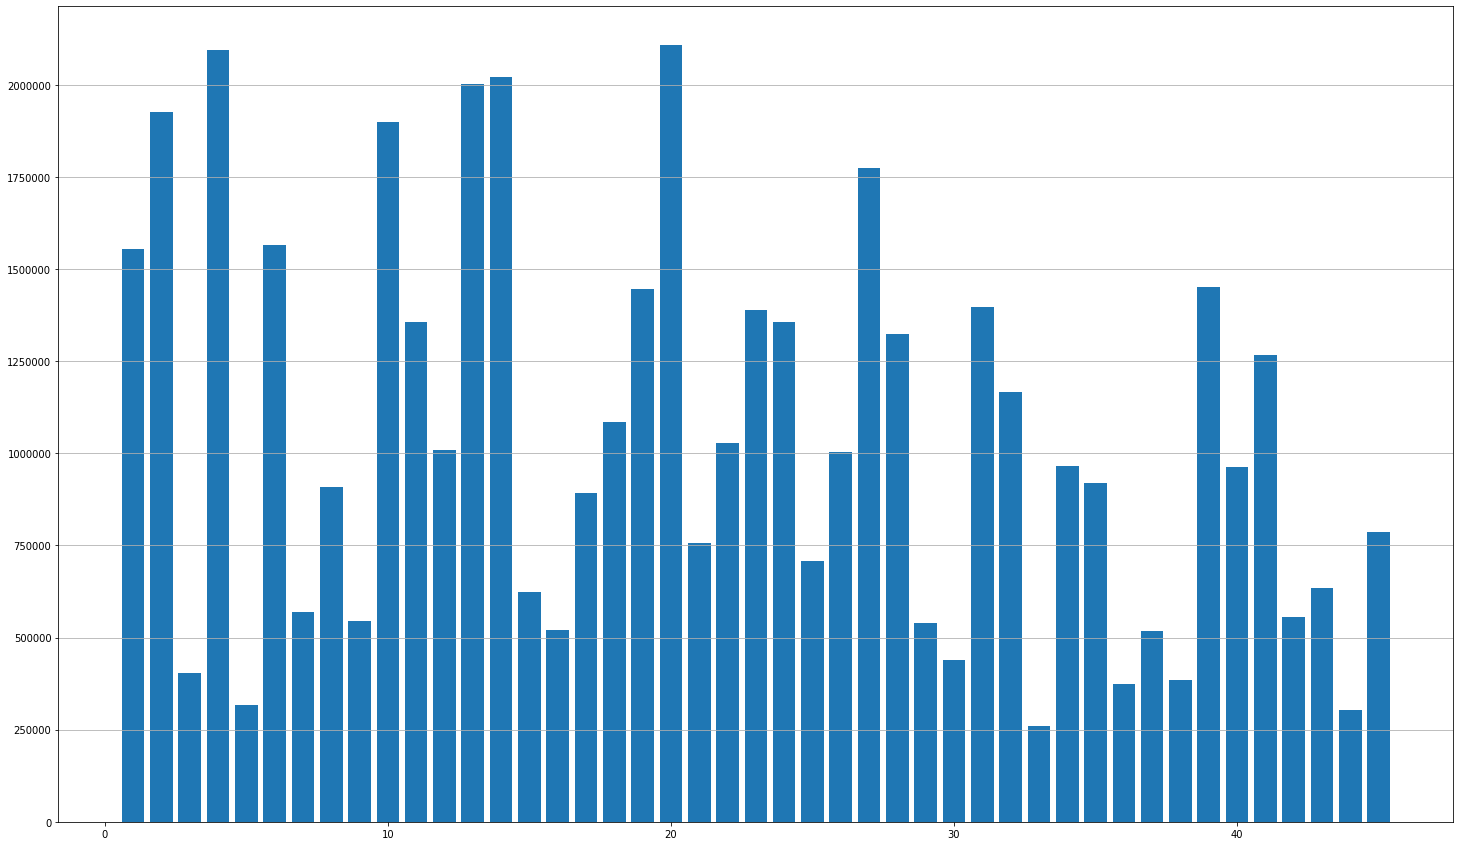

In [46]:
Store_sales=train.groupby('Store')['Weekly_Sales'].mean()
plt.figure(figsize=(25,15))
plt.bar(Store_sales.index,Store_sales.values)
plt.grid(axis='y')
plt.show()

In [55]:
train[train.Fuel_Price.isin([28,39,43,45,47,51,54,60,77,7,8])].size/train.size

0.0